0
1
2
3
4
5
6
7
8
9
20230206-102537new_Arena_5deg5deg_elevation.xlsx
20230206-104426new_Arena_5deg5deg_elevation.xlsx
20230207-124110new_Arena_5deg5deg_azimuth.xlsx
20230207-130120new_Arena_5deg5deg_azimuth.xlsx
0.0


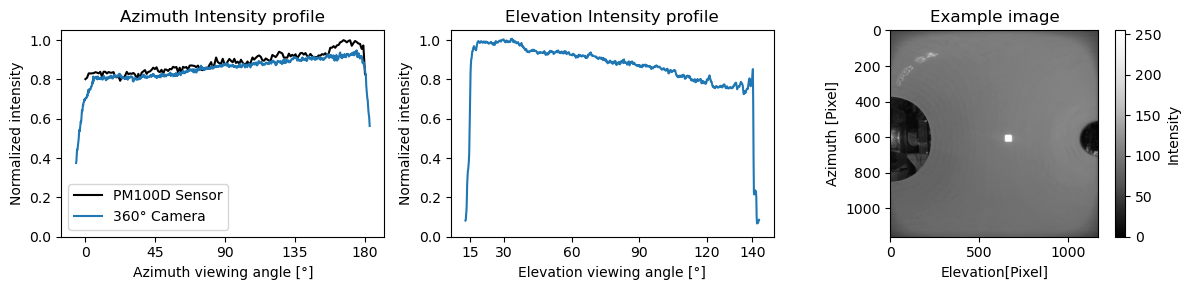

In [5]:
import numpy as np
import pylab as plt
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import glob
import matplotlib as mpl
import cv2


imgs2 =np.zeros([1200,1200,3,11])

    
for index, file in enumerate(glob.glob("Bleeding1*.PNG"), start=0): 
    print(index)
    #name = file
    #img = Image.open(file)
    
    
    img = cv2.imread(file)
    y,x = img.shape[0:2]
    imgs2[:,:,:,index] = img[int(y/2)-600:int(y/2)+600,int(x/2)-600:int(x/2)+600,:]
    
    #d = pd.read_excel(file)
    #imgs = np.stack(imgs,img,axis= 3)
    
    #all_data = all_data.append(d,ignore_index=True)

all_data = pd.DataFrame()    
all_data2 = pd.DataFrame()


for file in glob.glob("*new_Arena_5deg5deg_elevation.xlsx"):
    print(file)
    #name = file
    d = pd.read_excel(file)
    
    all_data = all_data.append(d,ignore_index=True)



df_Start = all_data.rename(columns={'Unnamed: 0': 'number',})
elevation = df_Start.groupby("number").mean()


for file in glob.glob("*new_Arena_5deg5deg_azimuth.xlsx"):
    print(file)
    #name = file
    d = pd.read_excel(file)
    
    all_data2 = all_data2.append(d,ignore_index=True)



df_Start2 = all_data2.rename(columns={'Unnamed: 0': 'number',})
azimuth = df_Start2.groupby("number").mean()





fig = plt.figure(figsize = (12,3))
xval = np.linspace(15,140,100)
ax = plt.subplot(1, 3, 2)
#ax.plot(xval,elevation["diff"]/elevation["diff"].max(),color = "black")
#ax.plot(df_Start["diff"]/df_Start["diff"].max())
xaxis = np.linspace(143,13,860)
tracex2 = np.min(np.mean(imgs2[600:610,240:1100,:,1:8],axis=(0,2)),axis=(1))
tracex2 = tracex2/ 112
#tracex2 = tracex2 /tracex2.max()
#tracex = tracex/tracex.max()+0.0000001
#ax.fill_between(xaxis, 0,tracex,alpha=1,color = (0.9, 0.9, 0.9))
ax.plot(xaxis,tracex2)

#ax.set_ylim(0,1.05)
ax.set_ylabel("Normalized intensity")
ax.set_xlabel("Elevation viewing angle [°]")
ax.set_title("Elevation Intensity profile")
ax.set_xticks([15,30,60,90,120,140])
ax.set_ylim(0,1.05)


#ax.set_yticks([15,30,60,90,120,140])


xval2 = np.linspace(0,180,170)
ax2 = plt.subplot(1, 3, 1)
ax2.plot(xval2,azimuth["diff"]/azimuth["diff"].max(),color = "black",label = "PM100D Sensor")
#ax2.plot(df_Start2["diff"]/df_Start2["diff"].max())


intens =imgs2[:,550:560,:,7].mean(axis=(1,2))
#intens = intens/intens.max()
intens = intens/112
xaxis4 = np.linspace(183,-6,len(intens))
ax2.plot(xaxis4,intens,label = "360° Camera")
ax2.legend()

#ax2.set_ylim(0,1.05)
ax2.set_ylabel("Normalized intensity")
ax2.set_xlabel("Azimuth viewing angle [°]")
ax2.set_title("Azimuth Intensity profile")
ax2.set_xticks([0,45,90,135,180])
ax2.set_ylim(0,1.05)
plt.tight_layout()

ax1 = plt.subplot(1,3,3)
ax1.set_title("Example image")

uniform = imgs2[5:-35,25:-5,:,7].mean(axis=(2))
print(uniform.min())
im = ax1.imshow(uniform,cmap = "Greys_r")
ax1.set_ylabel("Azimuth [Pixel]")
ax1.set_xlabel("Elevation[Pixel]")

               
fig.colorbar(im,ax = ax1,label='Intensity')
plt.tight_layout()
#fig.savefig("Arena_Intensity_new.svg")

mpl.rcParams['pdf.fonttype'] = 42       
#plt.savefig('Arena_Intensity_new.pdf')

(80, 1200, 3, 10)
0
(115, 518, 3)
0
1
2
3
4
5
6
7
8
9


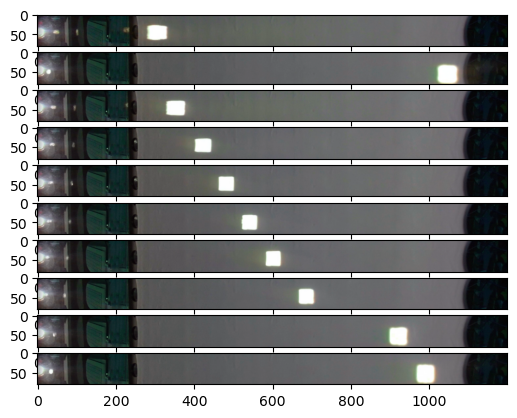

In [11]:
all_data = pd.DataFrame()    
all_data2 = pd.DataFrame()



#imgs =np.zeros([50,1200,3,10])
imgs =np.zeros([80,1200,3,10])
print(imgs.shape)

for index, file in enumerate(glob.glob("reflection effect*.PNG"), start=0): 
    print(index)
    #name = file
    #img = Image.open(file)
    
    
    img = cv2.imread(file)
    y,x = img.shape[0:2]
    #imgs[:,:,:,index] = img[int(y/2)-12:int(y/2)+38,int(x/2)-600:int(x/2)+600,:]
    #imgs[:,:,:,index] = img[int(y/2)+3:int(y/2)+23,int(x/2)-600:int(x/2)+600,:]
print (img.shape)
avg1 = img[30:40,:].mean(axis =(0,2))
avg2 = img[60:70,:].mean(axis =(0,2))
diff = (avg1-avg2)
norm = diff/diff.max()


    
for index, file in enumerate(glob.glob("Bleeding1*.PNG"), start=0): 
    print(index)
    #name = file
    #img = Image.open(file)
    
    
    img = cv2.imread(file)
    y,x = img.shape[0:2]
    #imgs[:,:,:,index] = img[int(y/2)-12:int(y/2)+38,int(x/2)-600:int(x/2)+600,:]
    imgs[:,:,:,index] = img[int(y/2)-40+3:int(y/2)+40+3,int(x/2)-600:int(x/2)+600,:]
    #d = pd.read_excel(file)
    #imgs = np.stack(imgs,img,axis= 3)
    
    #all_data = all_data.append(d,ignore_index=True)
    
    plt.subplot(10,1,index+1)
    plt.imshow(imgs[:,:,:,index].astype(int))

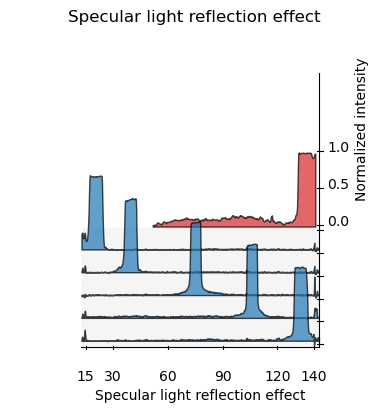

In [12]:
from matplotlib.collections import PolyCollection
import matplotlib.pyplot as plt
import math
import numpy as np


tracex = np.min(np.mean(imgs[30:50,240:1100,:,:],axis=(0,2)),axis=(1)) 

trace1 = imgs[40:50,240:1100,:,1].mean(axis=(0,2))- tracex
trace2 = imgs[40:50,240:1100,:,4].mean(axis=(0,2)) - tracex
trace3 = imgs[40:50,240:1100,:,7].mean(axis=(0,2)) - tracex
trace4 = imgs[40:50,240:1100,:,8].mean(axis=(0,2)) - tracex
trace5 = imgs[40:50,240:1100,:,0].mean(axis=(0,2))- tracex

xaxis2 = np.linspace(141,141-89,518)

%matplotlib inline


def polygon_under_graph(x, y):
    """
    Construct the vertex list which defines the polygon filling the space under
    the (x, y) line graph. This assumes x is in ascending order.
    """
    return [(x[0], 0.), *zip(x, y), (x[-1], 0.)]


ax = plt.figure().add_subplot(projection='3d')

x = np.linspace(0., 10., 31)
lambdas = range(1, 7)


verts = [
         polygon_under_graph(xaxis,(trace5)/np.amax(trace5)),
         polygon_under_graph(xaxis,(trace2)/np.amax(trace2)),
         polygon_under_graph(xaxis,(trace3)/np.amax(trace3)),
         polygon_under_graph(xaxis,(trace4)/np.amax(trace4)),
         polygon_under_graph(xaxis,(trace1)/np.amax(trace1)),
         polygon_under_graph(xaxis2,norm)]

# verts[i] is a list of (x, y) pairs defining polygon i.
#gamma = np.vectorize(math.gamma)
#verts = [polygon_under_graph(x, l**x * np.exp(-l) / gamma(x + 1))
         #for l in lambdas]
facecolors = plt.colormaps['summer'](np.linspace(0, 1, len(verts)))
facecolors = ["tab:blue","tab:blue","tab:blue","tab:blue","tab:blue","tab:red"]
poly = PolyCollection(verts, facecolors=facecolors, alpha=0.7,edgecolor = "black",linewidth=1.0)
ax.add_collection3d(poly, zs=lambdas, zdir='y')

ax.set(xlim=(15, 140), ylim=(1, 6), zlim=(0, 2),
       xlabel="Specular light reflection effect", zlabel="Normalized intensity")



ax.view_init(elev=30, azim=-90, vertical_axis='z')
ax.set_proj_type('ortho')
ax.grid(visible=False)
ax.set_frame_on(False)
ax.xaxis.pane.fill = False # Left pane
ax.yaxis.pane.fill = False # Right pane
ax.set_yticklabels([])
ax.set_xticks([15,30,60,90,120,140])
ax.set_zticks([0,0.5,1])
#ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

# Transparent spines
#ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
#ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
#ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

# Transparent panes
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

plt.title("Specular light reflection effect")

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42       
#plt.savefig('specular_reflection_3d_test.pdf')